# Data Science Coursera Capstone

#### The notebook is for Data Science Capstone project. This will contain the assignment for week 1 - Introduction/Business Problem and Data Section.

In [3]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Introduction/Business Problem 

Traffic collisions continue to be a serious problem. Roads safety is pressing concern for many countries, where road crash fatalities and disabilities is gradually being recognized as a major public health concern. According to World Health Organization (WHO); nearly 1.25 million people die in road crashes each year, on average 3,287 deaths a day. In addition, road traffic crashes rank as the 9th leading cause of death and account for 2.2% of all deaths globally.

Collisions are financial burden on government and society. Prediction of severity of collision helps local transport authority and emergency responders to manage traffic and avoid loss of life and property.

This project uses collision data of Seattle, WA. The aim of this project is to use data science methodology and machine learning to gain an understanding of the problem and predict the severity of collision and develop prevention mechanisms the same.

The target audience of the project is local Seattle government, police, rescue groups, and last but not least, car insurance institutes. The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries for the city.

# Data

In this phase we will explore the data and clean it for our analysis and model

### Data Source

The data was provided by Coursera but sourced from the Seattle Police Department, and it contains information about traffic collisions in the Seattle Area from 2004 to Present. 

The attributes that is available in this data and are relevant to this project include:

- Severity code - a measure of have severe the crash was
- Person count - how many people were involved in the crash
- Vehicle count - how many cars were involved in the crash
- Junction type - whether or not the accident occurred at a junction and what type it is
- Weather - what the weather was at the time of the crash
- Road condition - whether the road was wet, or something was on it, etc.
- Light condition - whether it was dark, or if there were streetlights present, etc.

In [64]:
# Import all Python libraries that we will need for this project

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import folium
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [65]:
#functions used later in the code
def show_summary(df):

    col_name = round(100*(df.isna().sum()/len(df)), 2)
    col_nuniq = df.nunique()    
    df_summary = pd.DataFrame({"data_type": df.dtypes,
                           "percent_missing_values": col_name,
                           "total_unique_values": col_nuniq}).sort_values(by=["percent_missing_values"],
                                                                            ascending=False)
    return df_summary

def plotbyInt_values(df):
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphPerRow=3
    nGraphRow = round(nCol / nGraphPerRow)
    fig, ax = plt.subplots(nGraphRow, nGraphPerRow,figsize=(24,24))
    for variable, subplot in zip(columnNames, ax.flatten()):
        #print(df[variable])
        if (variable!=''):
            _= df.pivot_table(index=variable,columns=columnNames[0], aggfunc='size').plot.bar(stacked=True, ax=subplot)
            for label in subplot.get_xticklabels():
                label.set_rotation(90)
                
def plotbycharvalues(colname):
    for i in range (0,len(colname)):
        bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 7)
        g = sns.FacetGrid(df, col=colname[i], hue="SEVERITYCODE", palette="Set1", col_wrap=4)
        g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
        g.axes[-1].legend()
        plt.show()

In [66]:
# Import data into Pandas data frame
df = pd.read_csv('Data-Collisions.csv')

# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Basic Insight of Dataset

In [67]:
# Check total records and columns
df.shape

(194673, 38)

#### We have 194673 records with 38 attributes

In [68]:
# Check data types
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [69]:
# Columns
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [70]:
# Statistical summary of each attribute
df.describe(include = "all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


#### We can now see how many unique values, which is the top value and the frequency of top value in the object-typed columns. Some values in the table above show as "NaN", this is because those numbers are not available regarding a particular column type.

#### Many of the columns either hold a key or code, these colummns can be removed from the dataframe. For columns which are not defined in metadata will also be dropped. STATUS and SEVERITYCODE.1 are not present in metadata. I am not deleting OBJECTID as it is a unique key and can be helpful in plotting. 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'EXCEPTRSNCODE','EXCEPTRSNDESC', SEVERITYCODE.1', 'SEVERITYDESC', 'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY'

In [71]:
df.drop(['INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1','SEVERITYDESC'
,'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY'],axis=1,inplace=True)

In [72]:
# Dataset summary
show_summary(df)

,data_type,percent_missing_values,total_unique_values
PEDROWNOTGRNT,object,97.60,1
SPEEDING,object,95.21,1
INATTENTIONIND,object,84.69,1
JUNCTIONTYPE,object,3.25,7
Y,float64,2.74,23839
X,float64,2.74,23563
LIGHTCOND,object,2.66,9
WEATHER,object,2.61,11
ROADCOND,object,2.57,9
COLLISIONTYPE,object,2.52,10


### Let's check for NULL or MISSING data on each column

In [73]:
# Let's check for NULL or MISSING data on each column
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
ADDRTYPE            1926
LOCATION            2677
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
ST_COLCODE            18
HITPARKEDCAR           0
dtype: int64

### Let's see how the dataset is spanned across years

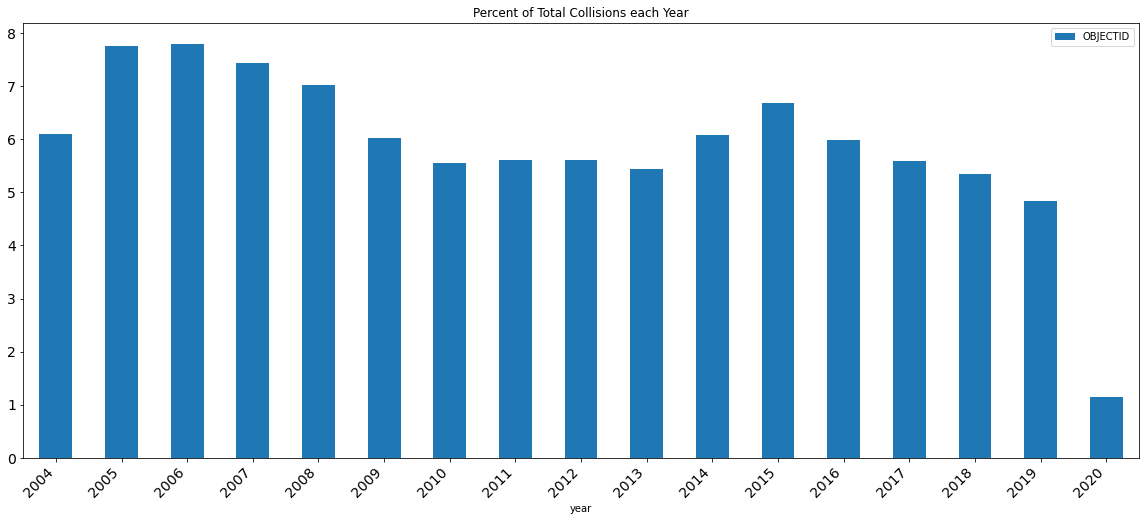

In [74]:
df["year"] = pd.DatetimeIndex(df.INCDATE).year 
df["month"] = pd.DatetimeIndex(df.INCDATE).month  
df["day"] = pd.DatetimeIndex(df.INCDATE).day  
df['dayofweek']= pd.DatetimeIndex(df.INCDATE).dayofweek
df['Hour'] = pd.DatetimeIndex(df.INCDTTM).hour.astype(int)
df_yr = round(100*(df[["year","OBJECTID"]].groupby(by=["year"]).count()/len(df)), 2)
# create a bar chart for visualization 
df_yr.plot(kind='bar', figsize=(20, 8));
plt.title("Percent of Total Collisions each Year");
plt.xticks(rotation=45, ha='right', size=14);
plt.yticks(size=14);
plt.show();

#### Year 2020 has less data compared to other years, this will cause unnecessary noise in prediction. Let's remove reccords for 2020.

In [75]:
# let's remove reccords for 2020
df = df[df["year"] != 2020]
print(df.shape)

(192428, 28)


In [76]:
#As per meta data  INATTENTIONIND, UNDERINFL,PEDROWNOTGRNT, SPEEDING, HITPARKEDCAR are indicators, let's see what values they have
print("INATTENTIONIND", '\t', df['INATTENTIONIND'].value_counts().to_frame('count'))
print("UNDERINFL", '\t', df['UNDERINFL'].value_counts().to_frame('count'))
print("PEDROWNOTGRNT", '\t', df['PEDROWNOTGRNT'].value_counts().to_frame('count'))
print("SPEEDING", '\t', df['SPEEDING'].value_counts().to_frame('count'))
print("HITPARKEDCAR", '\t', df['HITPARKEDCAR'].value_counts().to_frame('count'))

INATTENTIONIND 	    count
Y  29805
UNDERINFL 	    count
N  99013
0  80394
Y   5126
1   3995
PEDROWNOTGRNT 	    count
Y   4631
SPEEDING 	    count
Y   9261
HITPARKEDCAR 	     count
N  185524
Y    6904


### Let's clean the identifiers based on the uniques values in it. We will replace Y with 1 and N with 0

In [77]:
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace('Y',1, inplace=True)
df[["INATTENTIONIND"]] = df[["INATTENTIONIND"]].astype("int")

In [78]:
df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('N',0, inplace=True)
df["UNDERINFL"].replace('Y',1, inplace=True)
df[["UNDERINFL"]] = df[["UNDERINFL"]].astype("int")

In [79]:
df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df["PEDROWNOTGRNT"].replace('Y',1, inplace=True)
df[["PEDROWNOTGRNT"]] = df[["PEDROWNOTGRNT"]].astype("int")

In [80]:
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace('Y',1, inplace=True)
df[["SPEEDING"]] = df[["SPEEDING"]].astype("int")

In [81]:
df["HITPARKEDCAR"].replace('N',0, inplace=True)
df["HITPARKEDCAR"].replace('Y',1, inplace=True)
df[["HITPARKEDCAR"]] = df[["HITPARKEDCAR"]].astype("int")

### Let's review the categorical data in dataset

In [82]:
# Light conditions. Let's replace other and null as Unknown
df["LIGHTCOND"].replace('Other','Unknown', inplace=True)
df["LIGHTCOND"].replace(np.nan, 'Unknown', inplace=True)
print("LIGHTCOND",df['LIGHTCOND'].value_counts().to_frame('count'))
df['LIGHTCOND'].isna().sum()

LIGHTCOND                            count
Daylight                  115407
Dark - Street Lights On    48104
Unknown                    17860
Dusk                        5862
Dawn                        2480
Dark - No Street Lights     1522
Dark - Street Lights Off    1193


0

In [83]:
# Let's classify the data
df["LIGHTCOND"].replace('Dusk','Low Light', inplace=True)
df["LIGHTCOND"].replace('Dawn','Low Light', inplace=True)
df["LIGHTCOND"].replace('Dark - No Street Lights','Dark', inplace=True)
df["LIGHTCOND"].replace('Dark - Street Lights On', 'Dark', inplace=True)
df["LIGHTCOND"].replace('Dark - Street Lights Off','Dark', inplace=True)

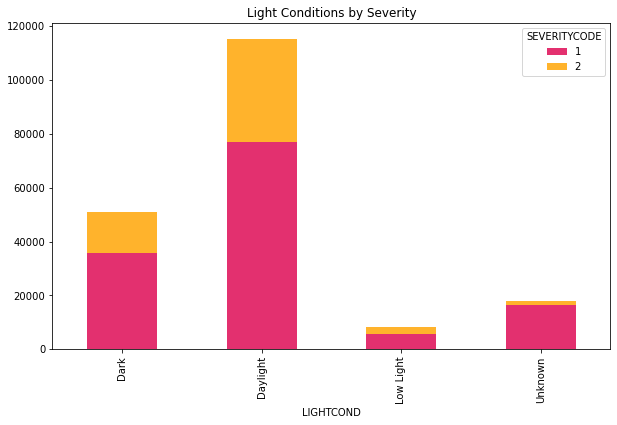

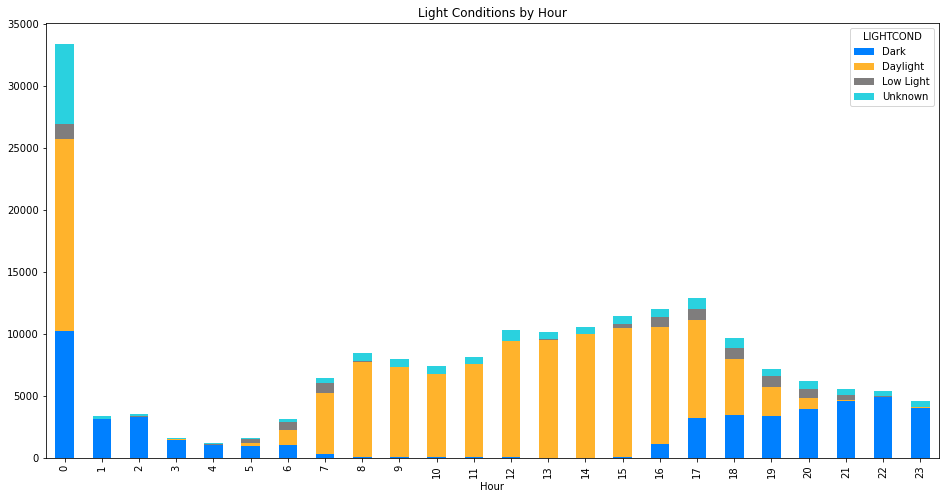

In [84]:
# Plot light condition by severity and hours in the day
df.pivot_table(index='LIGHTCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('#e3306f','#ffb32c'),figsize=(10, 6)   )
plt.title("Light Conditions by Severity");
df.pivot_table(index= ('Hour'),columns='LIGHTCOND', aggfunc='size').plot.bar(stacked=True , color = ('#0080ff','#ffb32c','#7f7d7d','#2ad1df'),figsize=(16, 8)   )
plt.title("Light Conditions by Hour");

#### From the chart it is evident that, INTDDTM is not correct, we will remove data with hour as 0 and light condition not as dark. for other unknown values it is visible from graph that mostly it is daylight in Seatlle from 6 am to 6 pm.

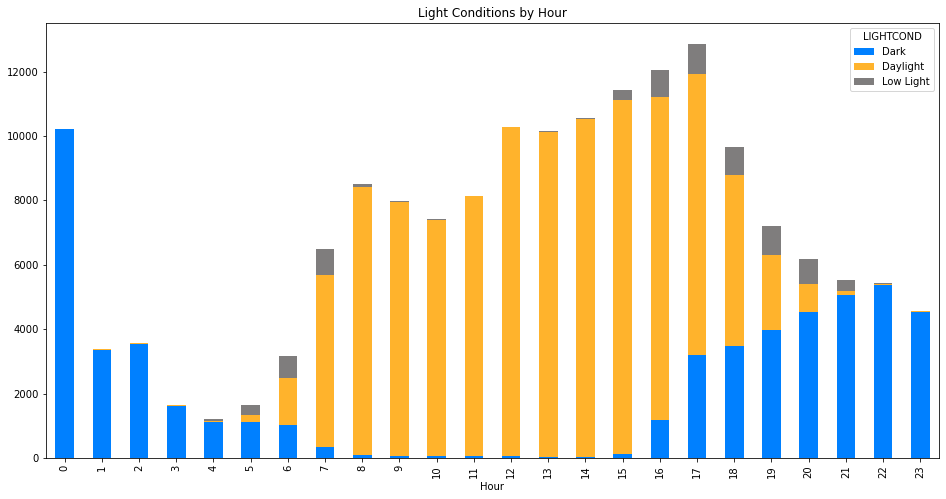

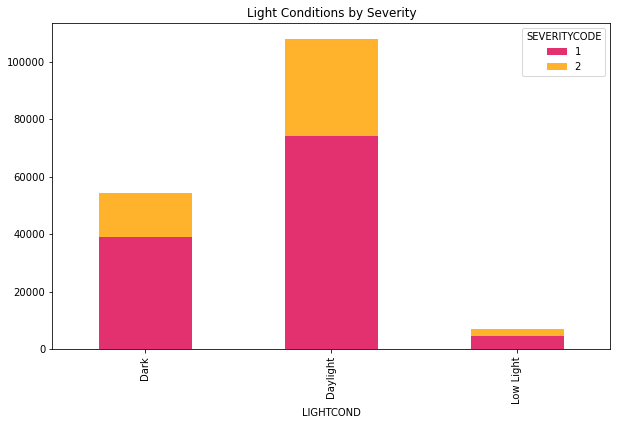

In [85]:
# Fill the missing values

df = df[((df["Hour"] == 0 )& (df["LIGHTCOND"]=='Dark')) | (df["Hour"] != 0)]
df.loc[df['Hour'].isin([0,1,2,3,4,5,19,20,21,22,23])&(df["LIGHTCOND"]=='Unknown'), 'LIGHTCOND'] = 'Dark'
df.loc[(df['Hour'] >= 6)&(df['Hour'] <= 18)&(df["LIGHTCOND"]=='Unknown') ,'LIGHTCOND'] = 'Daylight'
df.pivot_table(index= ('Hour'),columns='LIGHTCOND', aggfunc='size').plot.bar(stacked=True , color = ('#0080ff','#ffb32c','#7f7d7d','#2ad1df') ,figsize=(16, 8)   )
plt.title("Light Conditions by Hour");
df.pivot_table(index='LIGHTCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('#e3306f','#ffb32c')  ,figsize=(10, 6)   )
plt.title("Light Conditions by Severity");

### Let's review weather

WEATHER                           count
Clear                     99299
Raining                   30161
Overcast                  24651
Unknown                   13649
Snowing                     806
Fog/Smog/Smoke              547
Sleet/Hail/Freezing Rain     99
Blowing Sand/Dirt            51
Severe Crosswind             25
Unknown 0


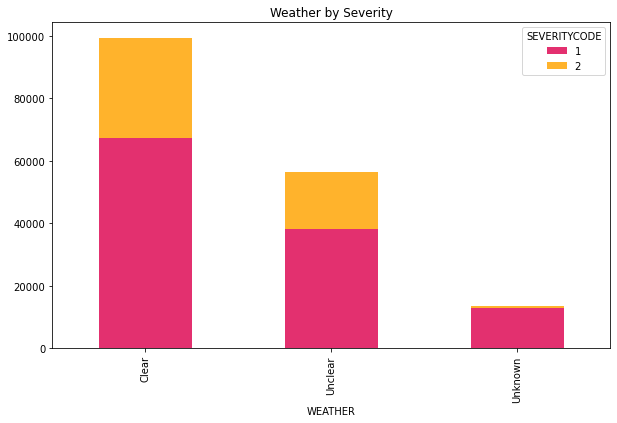

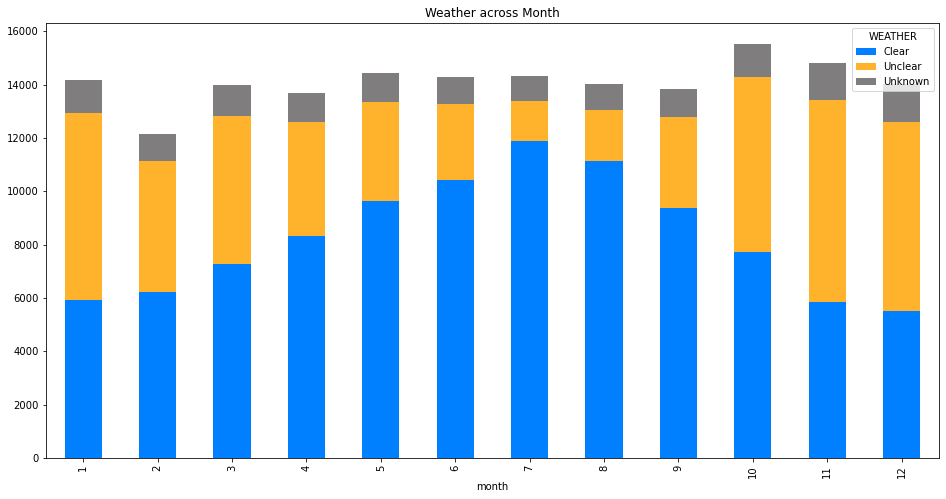

In [86]:
# Replace other and nulls with unknown
df["WEATHER"].replace(np.nan,'Unknown', inplace=True)
df["WEATHER"].replace('Other','Unknown', inplace=True)
print("WEATHER",df['WEATHER'].value_counts().to_frame('count'))
print("Unknown",df['WEATHER'].isna().sum())

# Let's classify weather in clear and not clear
df.loc[(df['WEATHER'] != 'Clear') & (df['WEATHER'] != 'Unknown'),'WEATHER'] = 'Unclear'
df.pivot_table(index='WEATHER',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c')    ,figsize=(10, 6)   )
plt.title("Weather by Severity");

# How is waether in Seatlle across the year
df.pivot_table(index= ('month'),columns='WEATHER', aggfunc='size').plot.bar(stacked=True , color = ('#0080ff','#ffb32c','#7f7d7d')    ,figsize=(16, 8)   )
plt.title("Weather across Month");

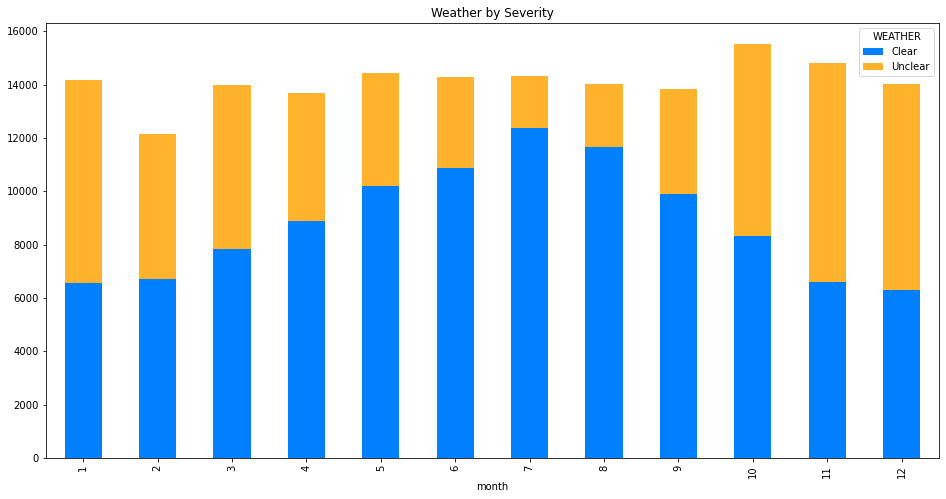

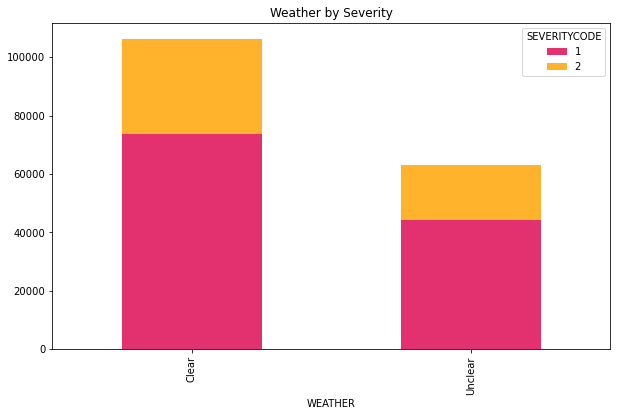

In [88]:
# Assuming that weather will be same on day across seattle. so replace the data where weather is unknown with the data where weather is not unknown and dates are matching 
df_notnull=df.loc[df['WEATHER']!='Unknown']
df_notnull = df_notnull[['INCDATE','WEATHER']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('INCDATE',inplace=True) 
s=df_notnull.to_dict()['WEATHER']
df.loc[df['WEATHER']=='Unknown','WEATHER']=df[('INCDATE')].map(s)
df = df[df["WEATHER"].notna()]
df.pivot_table(index= ('month'),columns='WEATHER', aggfunc='size').plot.bar(stacked=True , color = ('#0080ff','#ffb32c','#7f7d7d')    ,figsize=(16, 8)   )
plt.title("Weather by Severity");
df.pivot_table(index='WEATHER',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c')    ,figsize=(10, 6)   )
plt.title("Weather by Severity");

### Let's review road conditions

ROADCOND                  count
Dry             110988
Wet              43042
Unknown          13020
Ice               1112
Snow/Slush         899
Standing Water     103
Sand/Mud/Dirt       64
Oil                 57
Unknown 0


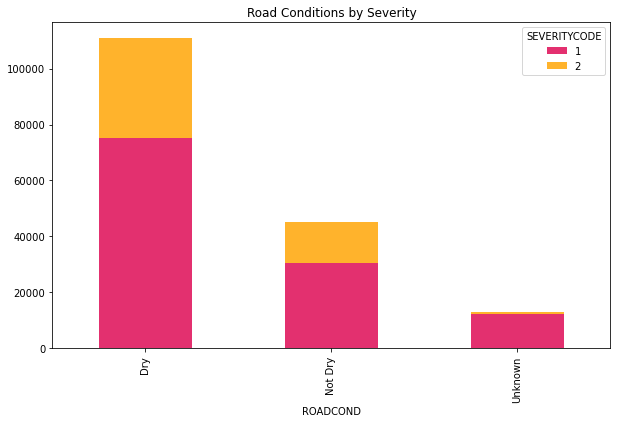

In [89]:
# Let's take a look at road conditions 
df["ROADCOND"].replace(np.nan,'Unknown', inplace=True)
df["ROADCOND"].replace('Other','Unknown', inplace=True)
print("ROADCOND",df['ROADCOND'].value_counts().to_frame('count'))
print("Unknown",df['ROADCOND'].isna().sum())

# Classify road condition as dry and not dry, there are lot of unknown
df.loc[(df['ROADCOND'] != 'Dry') & (df['ROADCOND'] != 'Unknown'),'ROADCOND'] = 'Not Dry'
df.pivot_table(index='ROADCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(10, 6)   )
plt.title("Road Conditions by Severity");

#### Let's assume that on a particular day at a particular location road condition will be same. Let's fill unknowns using this logic

In [90]:
# Create a key with date and location
df["Key1"]=df['INCDATE'].astype(str)+df['LOCATION']

ROADCOND           count
Dry      111033
Not Dry   46307
Unknown   11945
Unknown 0


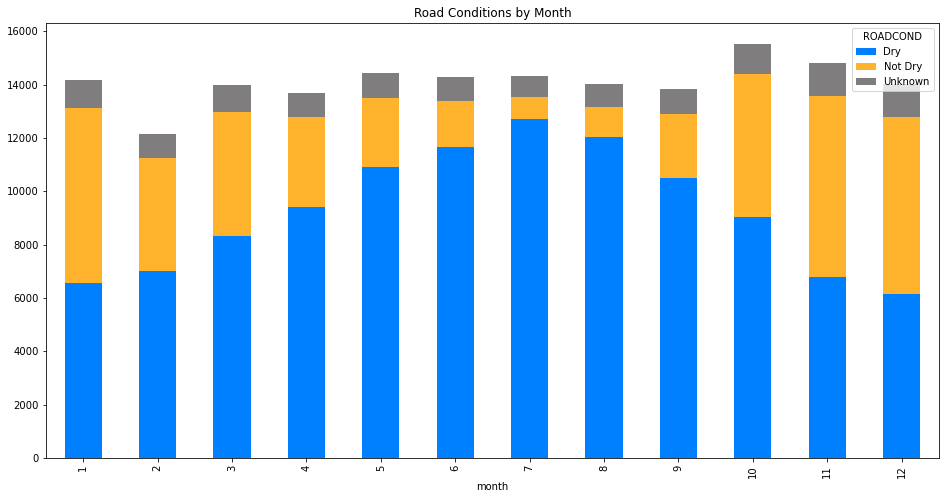

In [92]:
# Using the key's let's repalce unknown
df_notnull=df.loc[df['ROADCOND']!='Unknown']
df_notnull = df_notnull[['Key1','ROADCOND']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('Key1',inplace=True) 
s=df_notnull.to_dict()['ROADCOND']
df.loc[df['ROADCOND']=='Unknown','ROADCOND']=df[('Key1')].map(s)
df["ROADCOND"].replace(np.nan,'Unknown', inplace=True)
print("ROADCOND",df['ROADCOND'].value_counts().to_frame('count'))
print("Unknown",df['ROADCOND'].isna().sum())

# Stil unknowns
df.pivot_table(index= ('month'), columns='ROADCOND', aggfunc='size').plot.bar(stacked=True, color = ('#0080ff','#ffb32c','#7f7d7d'), figsize=(16, 8)  )
plt.title("Road Conditions by Month");

#### As road conditions are dry and not dry, we can say that road in Seatlle are mostly dry during March to October. With this assumption let's remove the nulls/unknowns

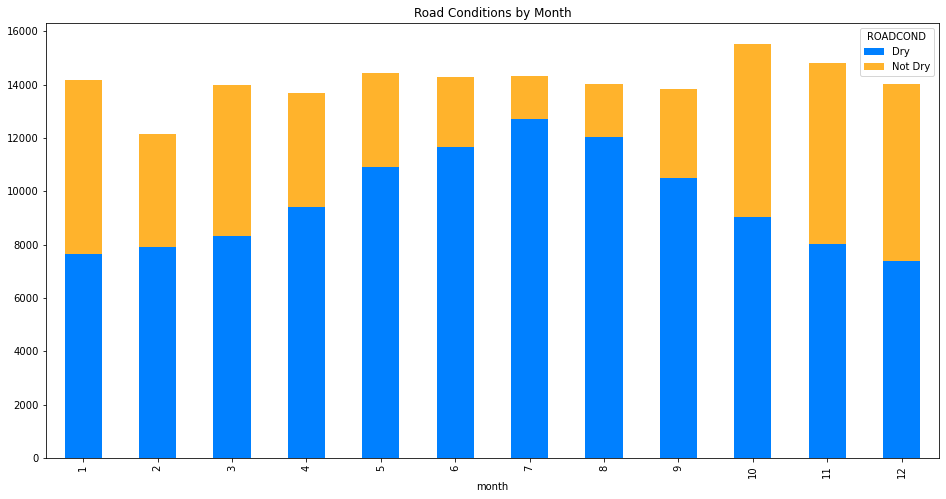

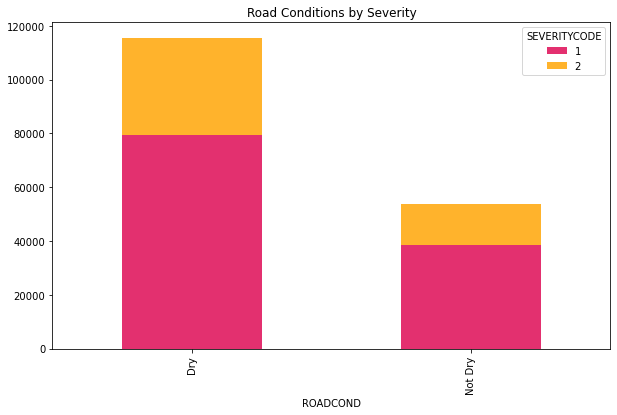

In [94]:
df.loc[df['month'].isin([1,2,11,12])&(df["ROADCOND"]=='Unknown'), 'ROADCOND'] = 'Dry'
df.loc[(df['month'] >= 3)&(df['month'] <= 10)&(df["ROADCOND"]=='Unknown') ,'ROADCOND'] = 'Not Dry'
df.pivot_table(index= ('month'),columns='ROADCOND', aggfunc='size').plot.bar(stacked=True , color = ('#0080ff','#ffb32c','#7f7d7d'), figsize=(16, 8)  )
plt.title("Road Conditions by Month");
df.pivot_table(index='ROADCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(10, 6)   )
plt.title("Road Conditions by Severity");

### Let's review Collision Type

COLLISIONTYPE             count
Parked Car  42335
Angles      31100
Rear Ended  30277
Other       21085
Sideswipe   16637
Left Turn   12351
Pedestrian   6068
Cycles       4937
Right Turn   2626
Head On      1848
Unknown 0
[23 22 51 50 21 52 66 40 57 56 41 17 67 49 31 65 42 48 64 53 54 60 43 87
 85 88 18]


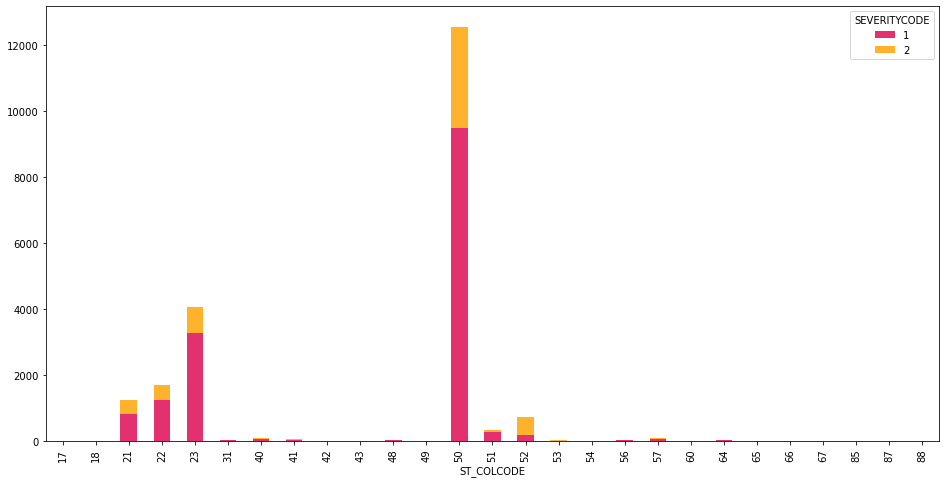

In [96]:
# There are lots of other data in collsion type, only 21 unknowns. Let's get rid of it
print("COLLISIONTYPE",df['COLLISIONTYPE'].value_counts().to_frame('count'))
print("Unknown",df['COLLISIONTYPE'].isna().sum())
df = df[df["COLLISIONTYPE"].notna()]

# Let's use ST_COLCODE to fill other value, first let's map the records where colllsion type as other with ST_COLCODE 
dfcollision = df[(df["COLLISIONTYPE"]=='Other')]
dfcollision=dfcollision[["ST_COLCODE","COLLISIONTYPE","SEVERITYCODE"]]
dfcollision.reset_index(inplace=True,drop = True)
dfcollision = dfcollision[dfcollision["ST_COLCODE"].notna()]
dfcollision = dfcollision[dfcollision["ST_COLCODE"] !=' ']
dfcollision[["ST_COLCODE"]] = dfcollision[['ST_COLCODE']].astype("int")
dfcollision.pivot_table(index= ('ST_COLCODE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(16, 8))
print(dfcollision["ST_COLCODE"].unique())

#### There are few colcodes which we can use, based on metadata we will now replace collsion type with correct values

(169264, 29)
(168788, 28)


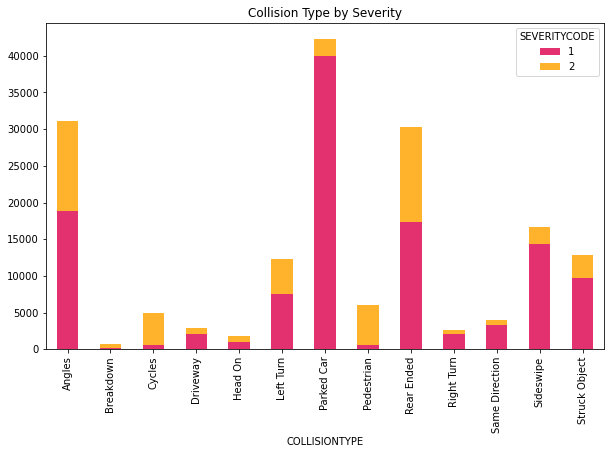

In [97]:
print(df.shape)
df = df[df["ST_COLCODE"].notna()]
df = df[df["ST_COLCODE"] !=' ']
df[["ST_COLCODE"]] = df[['ST_COLCODE']].astype("int")

# Dropping thise which are not in metadata or very less values
df = df[~df["ST_COLCODE"].isin([17,18,31,40,41,42,43,48,49,53,54,56,57,60,64,65,66,67,85,87,88])]

# Based in metadata  let's repalce collsion type
df.loc[df['ST_COLCODE'].isin([51,50]), 'COLLISIONTYPE'] = 'Struck Object'
df.loc[df['ST_COLCODE'].isin([21,22]), 'COLLISIONTYPE'] = 'Driveway'
df.loc[df['ST_COLCODE'].isin([52]), 'COLLISIONTYPE'] = 'Breakdown'
df.loc[df['ST_COLCODE'].isin([23]), 'COLLISIONTYPE'] = 'Same Direction'
df.drop(columns=[ 'ST_COLCODE'],axis=1,inplace=True)
print(df.shape)
df.pivot_table(index='COLLISIONTYPE', columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(10,6)  )
plt.title("Collision Type by Severity");

### Let's review address

ADDRTYPE                count
Block         109581
Intersection   56961
Alley           2246
is null 0


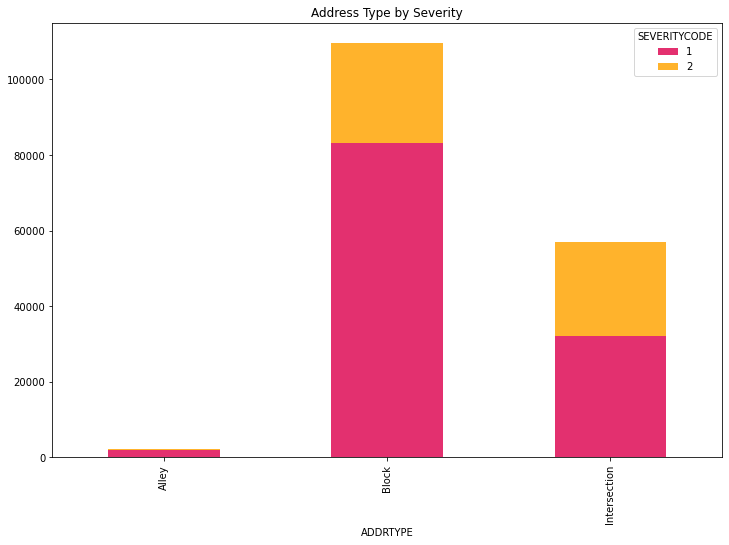

In [99]:
# Let's replace the null 
df["ADDRTYPE"].replace(np.nan,'Unknown', inplace=True)
df_notnull=df.loc[df['ADDRTYPE']!='Unknown']
df_notnull = df_notnull[['LOCATION','ADDRTYPE']]                    
df_notnull.drop_duplicates(inplace=True) 

# Let's use location to determine missing addresstype 
df_notnull.set_index('LOCATION',inplace=True) 
s=df_notnull.to_dict()['ADDRTYPE']
df.loc[df['ADDRTYPE']=='Unknown','ADDRTYPE']=df[('LOCATION')].map(s)
print("ADDRTYPE",df['ADDRTYPE'].value_counts().to_frame('count'))
print("is null",df['ADDRTYPE'].isna().sum())
df.pivot_table(index= ('ADDRTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(12, 8))
plt.title("Address Type by Severity");

### Let's review Junction Type

JUNCTIONTYPE                                                    count
Mid-Block (not related to intersection)            77983
At Intersection (intersection related)             54891
Mid-Block (but intersection related)               19244
Driveway Junction                                   8939
Unknown                                             5655
At Intersection (but not related to intersection)   1920
Ramp Junction                                        156
Unknown 0


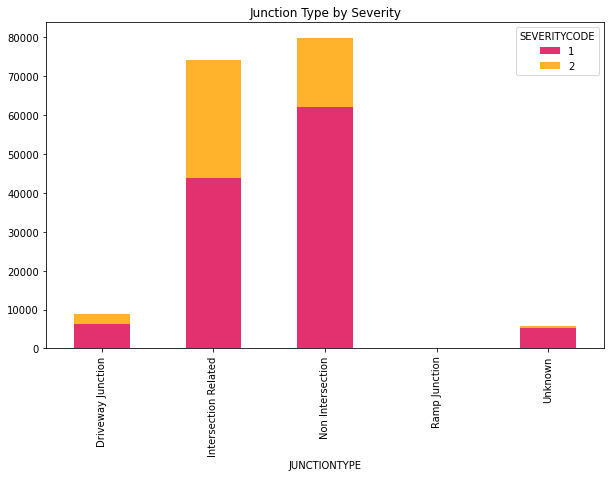

In [100]:
# Let's take a look at junction type
df["JUNCTIONTYPE"].replace(np.nan,'Unknown', inplace=True)
print("JUNCTIONTYPE",df['JUNCTIONTYPE'].value_counts().to_frame('count'))
print("Unknown",df['JUNCTIONTYPE'].isna().sum())

# Wwe can classify the below values to intersection related or not
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace({
   'Mid-Block (not related to intersection)':'Non Intersection' ,
   'At Intersection (intersection related)': 'Intersection Related',
   'Mid-Block (but intersection related)': 'Intersection Related',
   'At Intersection (but not related to intersection)':'Non Intersection',
    np.nan:'Unknown'
  })
df.pivot_table(index= ('JUNCTIONTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(10, 6))
plt.title("Junction Type by Severity");

JUNCTIONTYPE                       count
Non Intersection      81540
Intersection Related  75215
Driveway Junction      9740
Ramp Junction          1998
is null 295


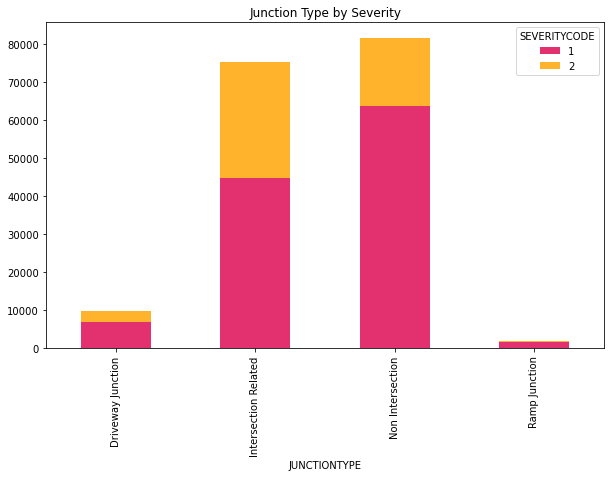

In [101]:
# Let's take care the unknowns, how about using location again? 
df_notnull=df.loc[df['JUNCTIONTYPE']!='Unknown']
df_notnull = df_notnull[['LOCATION','JUNCTIONTYPE']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('LOCATION',inplace=True) 
s=df_notnull.to_dict()['JUNCTIONTYPE']
df.loc[df['JUNCTIONTYPE']=='Unknown','JUNCTIONTYPE']=df[('LOCATION')].map(s)
print("JUNCTIONTYPE",df['JUNCTIONTYPE'].value_counts().to_frame('count'))
print("is null",df['JUNCTIONTYPE'].isna().sum())
df["JUNCTIONTYPE"].replace(np.nan,'Unknown', inplace=True)

# Works perfectly only 295 unknowns, lets delete these records
df = df[df["JUNCTIONTYPE"] != 'Unknown']
df.pivot_table(index= ('JUNCTIONTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('#e3306f','#ffb32c'), figsize=(10, 6))
plt.title("Junction Type by Severity");

#### During the Data phase - we explored the dataset and cleaned it up by replacing the missing and NaN values. We dropped the columns or attributes that is not helpful for our model. In week 2 of assignment we will continue to create machine learning model.